<a href="https://colab.research.google.com/github/2303A51618/Data-Mining/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/diabetes_young_adults_india.csv')  # Change to read_excel() if needed
df.head()


,ID,Age,Gender,Region,Family_Income,Family_History_Diabetes,Parent_Diabetes_Type,Genetic_Risk_Score,BMI,Physical_Activity_Level,...,Smoking,Alcohol_Consumption,Fasting_Blood_Sugar,HbA1c,Cholesterol_Level,Prediabetes,Diabetes_Type,Sleep_Hours,Stress_Level,Screen_Time
0,1,21,Male,North,2209393,No,NaN,6,31.4,Sedentary,...,Yes,No,95.6,9.5,163.3,Yes,NaN,7.7,7,6.8
1,2,18,Female,Central,387650,No,NaN,5,24.4,Active,...,No,No,164.9,5.0,169.1,Yes,NaN,7.9,8,6.0
2,3,25,Male,North,383333,No,NaN,6,20.0,Moderate,...,No,No,110.5,8.3,296.3,Yes,Type 1,7.6,8,4.6
3,4,22,Male,Northeast,2443733,No,NaN,4,39.8,Moderate,...,No,Yes,160.7,4.6,252.8,No,NaN,9.5,2,10.9
4,5,19,Male,Central,1449463,No,NaN,4,19.2,Moderate,...,No,Yes,73.7,5.3,252.3,No,NaN,6.4,2,1.3


In [3]:
# Basic info about the dataset
df.info()

# Summary statistics
df.describe()

# Check for null or missing values
df.isnull().sum()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100000 non-null  int64  
 1   Age                      100000 non-null  int64  
 2   Gender                   100000 non-null  object 
 3   Region                   100000 non-null  object 
 4   Family_Income            100000 non-null  int64  
 5   Family_History_Diabetes  100000 non-null  object 
 6   Parent_Diabetes_Type     34903 non-null   object 
 7   Genetic_Risk_Score       100000 non-null  int64  
 8   BMI                      100000 non-null  float64
 9   Physical_Activity_Level  100000 non-null  object 
 10  Dietary_Habits           100000 non-null  object 
 11  Fast_Food_Intake         100000 non-null  int64  
 12  Smoking                  100000 non-null  object 
 13  Alcohol_Consumption      100000 non-null  object 
 14  Fasti

,ID,Age,Gender,Region,Family_Income,Family_History_Diabetes,Parent_Diabetes_Type,Genetic_Risk_Score,BMI,Physical_Activity_Level,...,Smoking,Alcohol_Consumption,Fasting_Blood_Sugar,HbA1c,Cholesterol_Level,Prediabetes,Diabetes_Type,Sleep_Hours,Stress_Level,Screen_Time
0,1,21,Male,North,2209393,No,NaN,6,31.4,Sedentary,...,Yes,No,95.6,9.5,163.3,Yes,NaN,7.7,7,6.8
1,2,18,Female,Central,387650,No,NaN,5,24.4,Active,...,No,No,164.9,5.0,169.1,Yes,NaN,7.9,8,6.0
2,3,25,Male,North,383333,No,NaN,6,20.0,Moderate,...,No,No,110.5,8.3,296.3,Yes,Type 1,7.6,8,4.6
3,4,22,Male,Northeast,2443733,No,NaN,4,39.8,Moderate,...,No,Yes,160.7,4.6,252.8,No,NaN,9.5,2,10.9
4,5,19,Male,Central,1449463,No,NaN,4,19.2,Moderate,...,No,Yes,73.7,5.3,252.3,No,NaN,6.4,2,1.3


In [6]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                  ID            Age  Family_Income  Genetic_Risk_Score  \
count  100000.000000  100000.000000   1.000000e+05       100000.000000   
mean    50000.500000      20.007890   1.299440e+06            5.505340   
std     28867.657797       3.154934   6.919403e+05            2.872218   
min         1.000000      15.000000   1.000040e+05            1.000000   
25%     25000.750000      17.000000   7.022028e+05            3.000000   
50%     50000.500000      20.000000   1.299990e+06            6.000000   
75%     75000.250000      23.000000   1.898916e+06            8.000000   
max    100000.000000      25.000000   2.499974e+06           10.000000   

                 BMI  Fast_Food_Intake  Fasting_Blood_Sugar          HbA1c  \
count  100000.000000     100000.000000        100000.000000  100000.000000   
mean       28.028089          4.988580           125.072216       7.006461   
std         6.924196          3.169762            31.788613       1.735327   


In [9]:
# Assuming 'df' contains your data
numeric_data = df.select_dtypes(include=np.number) # Extract numerical features from df

correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           ID       Age  Family_Income  Genetic_Risk_Score  \
ID                   1.000000  0.003568      -0.003564            0.001799   
Age                  0.003568  1.000000      -0.001769            0.001340   
Family_Income       -0.003564 -0.001769       1.000000           -0.011137   
Genetic_Risk_Score   0.001799  0.001340      -0.011137            1.000000   
BMI                  0.006861 -0.000482       0.004825           -0.000718   
Fast_Food_Intake    -0.004999  0.006896       0.004832           -0.001631   
Fasting_Blood_Sugar  0.000203 -0.001088      -0.002477           -0.002304   
HbA1c                0.000385  0.006189      -0.003064           -0.000352   
Cholesterol_Level   -0.000569 -0.000582      -0.000939            0.004004   
Sleep_Hours          0.001116 -0.000743       0.002550            0.000286   
Stress_Level         0.001973  0.004517      -0.002848            0.002548   
Screen_Time          0.000060  0.000513    

In [10]:
numeric_data = df.select_dtypes(include=np.number) # This line creates the 'numeric_data' DataFrame

correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           ID       Age  Family_Income  Genetic_Risk_Score  \
ID                   1.000000  0.003568      -0.003564            0.001799   
Age                  0.003568  1.000000      -0.001769            0.001340   
Family_Income       -0.003564 -0.001769       1.000000           -0.011137   
Genetic_Risk_Score   0.001799  0.001340      -0.011137            1.000000   
BMI                  0.006861 -0.000482       0.004825           -0.000718   
Fast_Food_Intake    -0.004999  0.006896       0.004832           -0.001631   
Fasting_Blood_Sugar  0.000203 -0.001088      -0.002477           -0.002304   
HbA1c                0.000385  0.006189      -0.003064           -0.000352   
Cholesterol_Level   -0.000569 -0.000582      -0.000939            0.004004   
Sleep_Hours          0.001116 -0.000743       0.002550            0.000286   
Stress_Level         0.001973  0.004517      -0.002848            0.002548   
Screen_Time          0.000060  0.000513    

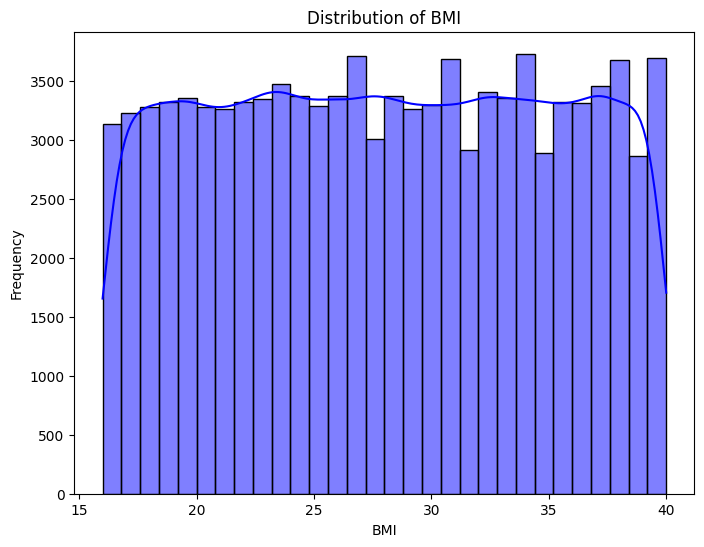

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, bins=30, color='blue') # Changed 'data' to 'df'
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

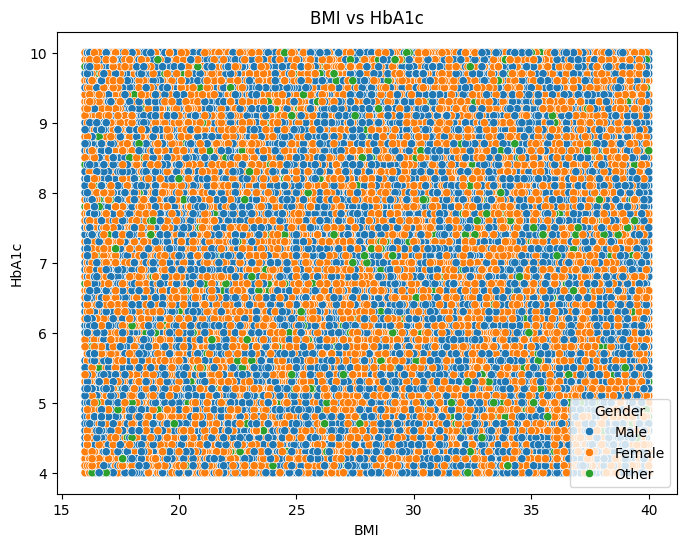

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BMI'], y=df['HbA1c'], hue=df['Gender']) # Changed 'data' to 'df'
plt.title("BMI vs HbA1c")
plt.xlabel("BMI")
plt.ylabel("HbA1c")
plt.show()

In [16]:
# Assuming 'df' contains your data
numeric_data = df.select_dtypes(include=np.number) # Extract numerical features from df

correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                           ID       Age  Family_Income  Genetic_Risk_Score  \
ID                   1.000000  0.003568      -0.003564            0.001799   
Age                  0.003568  1.000000      -0.001769            0.001340   
Family_Income       -0.003564 -0.001769       1.000000           -0.011137   
Genetic_Risk_Score   0.001799  0.001340      -0.011137            1.000000   
BMI                  0.006861 -0.000482       0.004825           -0.000718   
Fast_Food_Intake    -0.004999  0.006896       0.004832           -0.001631   
Fasting_Blood_Sugar  0.000203 -0.001088      -0.002477           -0.002304   
HbA1c                0.000385  0.006189      -0.003064           -0.000352   
Cholesterol_Level   -0.000569 -0.000582      -0.000939            0.004004   
Sleep_Hours          0.001116 -0.000743       0.002550            0.000286   
Stress_Level         0.001973  0.004517      -0.002848            0.002548   
Screen_Time          0.000060  0.000513    